In [1009]:
import sys
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates

warnings.filterwarnings("ignore")

sns.set(style='ticks', font_scale=1.25)

In [1010]:
workdir = '../examples/test_daily/outputs'

Depth = [0.01, 0.05, 0.15, 0.30,0.50,0.80,1.10,1.60,2.40, 3.20, 4.00, 5.00,7.00,9.00, 12.00, 15.00, 20.00, 25.00, 30.00, 40.00]

# year_list = np.arange(1981, 1986)
# year_list = np.arange(1991, 1996)
# year_list = np.arange(2001, 2006)
# year_list = np.arange(2011, 2015)

n_shows = 30

year_dump = 1921
year_list = np.arange(year_dump, year_dump + n_shows)
# year_list = np.arange(1806, 1811)

0 1921
1 1922
2 1923
3 1924
4 1925
5 1926
6 1927
7 1928
8 1929
9 1930
10 1931
11 1932
12 1933
13 1934
14 1935
15 1936
16 1937
17 1938
18 1939
19 1940
20 1941
21 1942
22 1943
23 1944
24 1945
25 1946
26 1947
27 1948
28 1949
29 1950


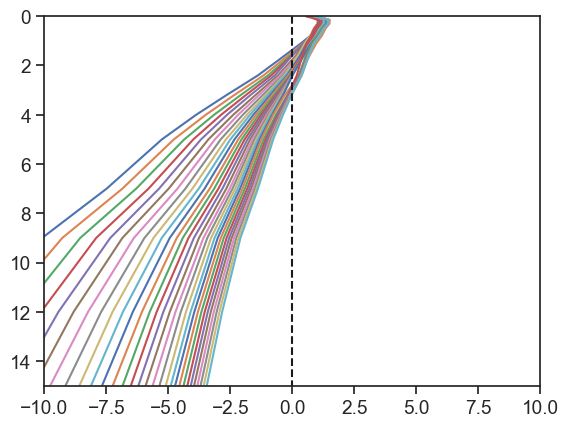

In [1011]:
for i, yr in enumerate(year_list):

    dump0 = pd.read_csv(os.path.join(workdir, '01010'+str(yr)+'da'), delim_whitespace=True, index_col = 1, date_format = "%d%m%Y")
    dump1 = pd.read_csv(os.path.join(workdir, '01010'+str(yr)+'ds'), delim_whitespace=True, index_col = 1, date_format = "%d%m%Y")

    if i ==0 :

        out_da = dump0.copy()
        out_ds = dump1.copy()
    
    else:

        out_da = pd.concat([out_da, dump0])
        out_ds = pd.concat([out_ds, dump1])

    print(i, yr)

    TSOIL0 = dump1[['TEMP_1', 'TEMP_2', 'TEMP_3', 'TEMP_4', 'TEMP_5', 'TEMP_6', 'TEMP_7',
       'TEMP_8', 'TEMP_9', 'TEMP_10', 'TEMP_11', 'TEMP_12', 'TEMP_13',
       'TEMP_14', 'TEMP_15', 'TEMP_16', 'TEMP_17', 'TEMP_18', 'TEMP_19',
       'TEMP_20']].values
    
    plt.plot(TSOIL0[0:, ].mean(axis=0), Depth, label = str(yr))
    
plt.vlines(0, ymin = 0, ymax = 40, linestyles='dashed', colors= 'k')
plt.ylim([15, 0])
plt.xlim([-10,10])

if len(year_list)<=5: plt.legend()


-3.0116661

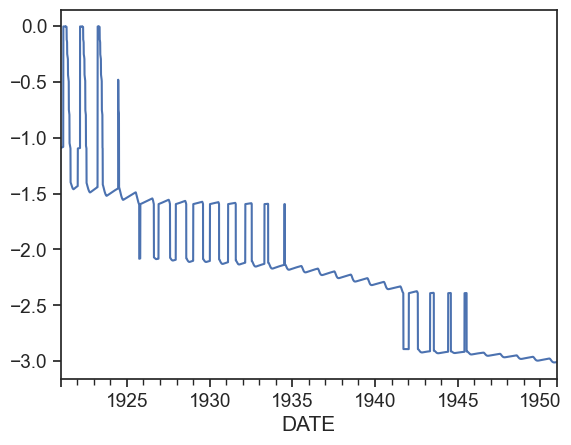

In [1012]:
out_da['ACTV_LYR'][out_da['ACTV_LYR']<-8888] = np.nan
out_da['ACTV_LYR'].plot()
out_da['ACTV_LYR'].min()

<Axes: xlabel='DATE'>

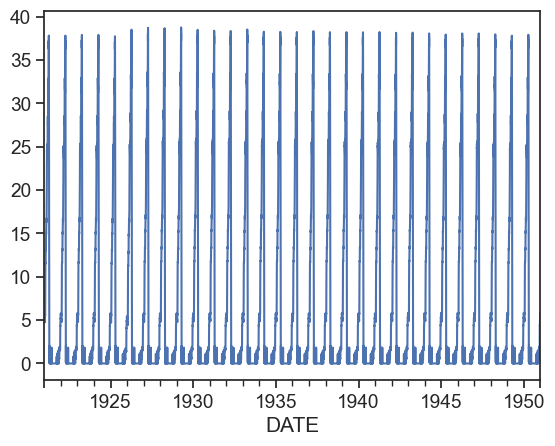

In [1013]:
out_da['SNOWPACK'].plot()

In [1014]:
out_ds.columns

Index(['DOY', 'HOUR', 'SOL_RADN', 'AIR_TEMP', 'HUM', 'WIND', 'PREC', 'SOIL_RN',
       'SOIL_LE', 'SOIL_H', 'SOIL_G', 'ECO_RN', 'ECO_LE', 'ECO_H', 'ECO_G',
       'TEMP_1', 'TEMP_2', 'TEMP_3', 'TEMP_4', 'TEMP_5', 'TEMP_6', 'TEMP_7',
       'TEMP_8', 'TEMP_9', 'TEMP_10', 'TEMP_11', 'TEMP_12', 'TEMP_13',
       'TEMP_14', 'TEMP_15', 'TEMP_16', 'TEMP_17', 'TEMP_18', 'TEMP_19',
       'TEMP_20', 'TEMP_LITTER', 'TEMP_SNOW'],
      dtype='object')

In [1015]:
TSOIL = out_ds[['TEMP_1', 'TEMP_2', 'TEMP_3', 'TEMP_4', 'TEMP_5', 'TEMP_6', 'TEMP_7',
       'TEMP_8', 'TEMP_9', 'TEMP_10', 'TEMP_11', 'TEMP_12', 'TEMP_13',
       'TEMP_14', 'TEMP_15', 'TEMP_16', 'TEMP_17', 'TEMP_18', 'TEMP_19',
       'TEMP_20']].values

print(TSOIL.shape)

(10957, 20)


Text(0, 0.5, 'Depth (m)')

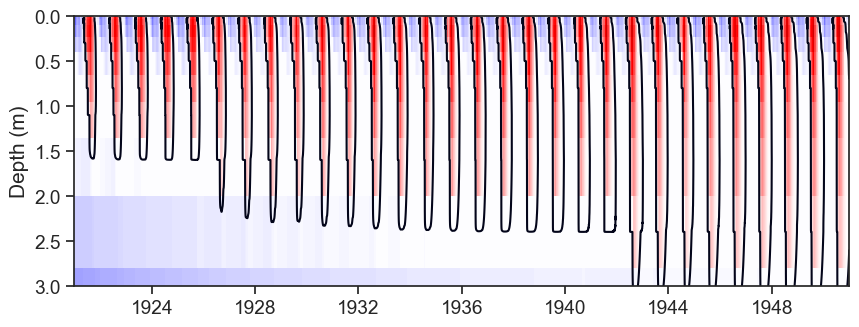

In [1016]:
plt.figure(figsize=[10,3.5])
plt.pcolormesh(out_ds.index, Depth, TSOIL.T, cmap = 'seismic', vmax=15, vmin=-15)
plt.contour(out_ds.index, Depth, TSOIL.T, [0])
plt.ylim([3, 0])
plt.ylabel('Depth (m)')